In [1]:
#Multivariate Linear Regression
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
companies = pd.read_csv("/content/1000_Companies.csv")

# Display column names
columns = companies.columns

# Display first few rows
companies.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]


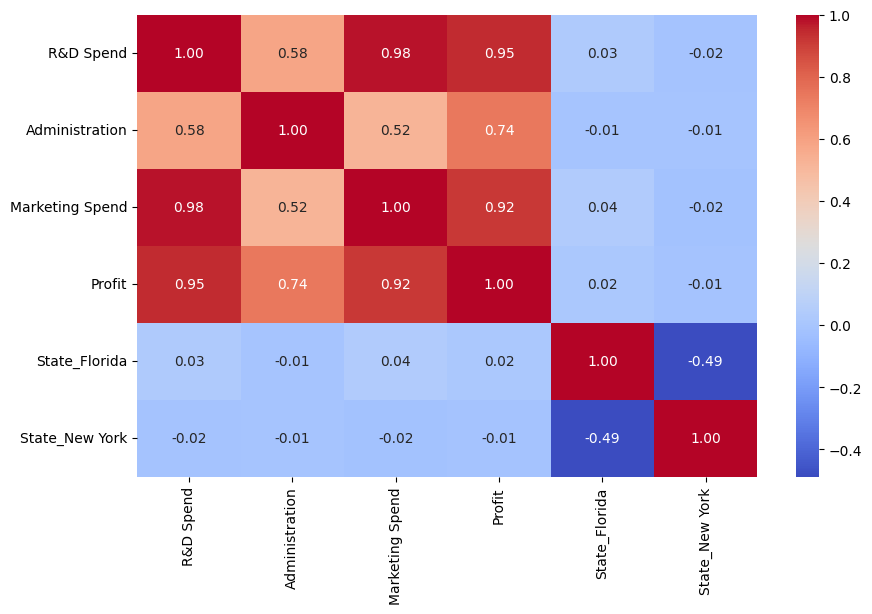

In [4]:
# Multivariate Linear Regression
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

# Display first five rows of X
print(X[:5])

# Data Visualization

# Convert categorical columns to numerical using one-hot encoding
companies_encoded = pd.get_dummies(companies, drop_first=True)

# Building the Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(companies_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


In [6]:
# Multivariate Linear Regression
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

# Display first five rows of X
print(X[:5])


[[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 [144372.41 118671.85 383199.62 2]
 [142107.34 91391.77 366168.42 1]]


In [7]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Predicting the Test set results
y_pred = regressor.predict(X_test)
print("Predicted:", y_pred[:5])
print("Actual:", y_test[:5])

# Calculating the Coefficients
print(regressor.coef_)

# Calculating the Intercept
print(regressor.intercept_)


Mean Squared Error: 192169702.49522424
R^2 Score: 0.9112595959622045
Predicted: [ 89624.88499984  88261.44060358  94728.57723845 176034.49990954
  83234.84214495]
Actual: [ 89012.02672  87654.55773  94093.35179 175396.2616   83356.61784]
[ 5.27572958e-01  8.44490415e-01  1.06639226e-01 -3.54869857e+02]
-51144.726425721805


In [8]:
# Multivariate Linear Regression
# Calculating the R squared value and the mean squared error
from sklearn.metrics import r2_score, mean_squared_error

print("R squared value: %.2f" % r2_score(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


R squared value: 0.91
Mean squared error: 192169702.50


In [9]:
# Multivariate Regression with Gradient Descent
# Submission Activity 4
# Multivarient with Gradient Descent
# Multivariate with Gradient Descent

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Display first 5 rows
print(X[:5], y[:5])

# Standardizing the features
sc = StandardScaler()
X_transform = sc.fit_transform(X)



[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]] [151.  75. 141. 206. 135.]


In [10]:
# Multivariate with Gradient Descent

from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
lin_reg = LinearRegression()

# Train the model on the standardized dataset
lin_reg.fit(X_transform, y)

# Print the intercept and coefficients
print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)


Intercept: 152.13348416289594
Coefficients: [ -0.47612079 -11.40686692  24.72654886  15.42940413 -37.67995261
  22.67616277   4.80613814   8.42203936  35.73444577   3.21667372]


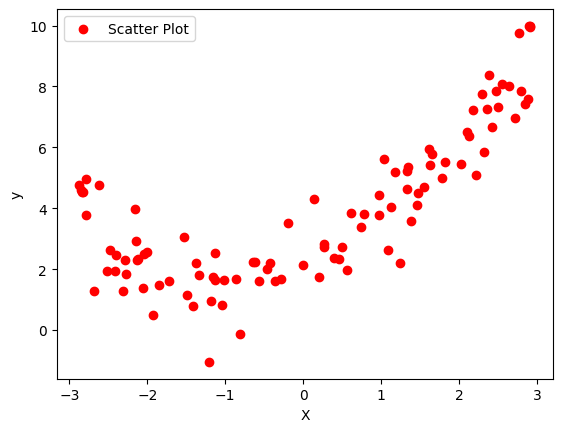

In [11]:
# Polynomial Regression Data Generation

import numpy as np
import matplotlib.pyplot as plt

# Number of samples
m = 100

# Generate random input feature X in the range [-3, 3]
X = 6 * np.random.rand(m, 1) - 3

# Generate target variable y with polynomial relationship and Gaussian noise
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Scatter plot of generated data
plt.scatter(X, y, c='red', label='Scatter Plot')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [12]:
# Polynomial Features/Regression
# Polynomial Regression using Scikit-Learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate dataset
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)  # Quadratic function with noise

# Transform features to include polynomial terms
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Display first two transformed samples
print("Poly Features:", X_poly[0], X_poly[1])

# Train Linear Regression model on polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# Display learned parameters
print("Parameters:", lin_reg.intercept_, lin_reg.coef_)


Poly Features: [-2.01906878  4.07663873] [-2.88086722  8.29939595]
Parameters: [1.74854365] [[0.99458859 0.54649479]]


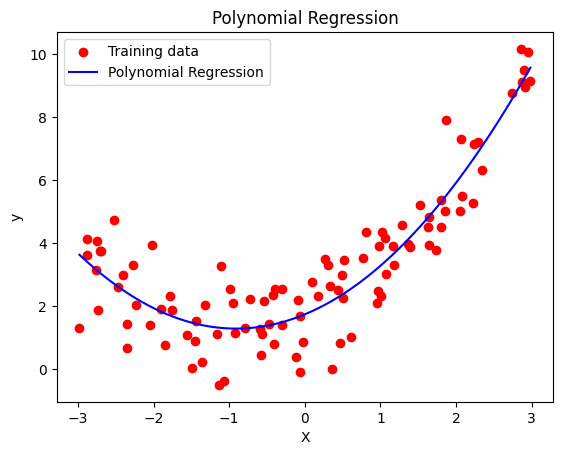

In [13]:
# Draw the Line
# Plotting Polynomial Regression Results

import numpy as np
import matplotlib.pyplot as plt

# Scatter plot of actual data points
plt.scatter(X, y, color='red', label='Training data')

# Generate smooth curve points for prediction
myline = np.linspace(min(X), max(X), 500).reshape(-1, 1)

# Predict values using the trained polynomial regression model
plt.plot(myline, lin_reg.predict(poly_features.transform(myline)), color='blue', label='Polynomial Regression')

# Add labels and title
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')

# Show legend and plot
plt.legend()
plt.show()


In [14]:
#  What type is created when degree = 1?

# When degree=1 in PolynomialFeatures, it results in a linear regression model. The dataset is transformed into a linear feature space, meaning no polynomial terms (other than the original feature) are included.
# Create data of size 25
import numpy as np

np.random.seed(0)  # For reproducibility
X = np.random.uniform(-3, 3, 25).reshape(-1, 1)  # 25 random points between -3 and 3
y = 2 * X**2 + 3 * X + np.random.randn(25, 1) * 2  # Quadratic relationship with noise




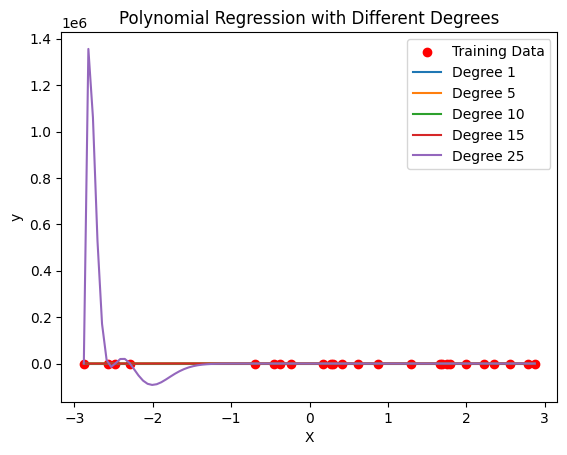

In [15]:
  # Show different curves with Degree = (1, 5, 10, 15, 25)
  import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = [1, 5, 10, 15, 25]

plt.scatter(X, y, color='red', label="Training Data")  # Plot original data

X_line = np.linspace(min(X), max(X), 100).reshape(-1, 1)  # Line for smooth curve

for d in degrees:
    poly_features = PolynomialFeatures(degree=d)
    X_poly = poly_features.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)

    X_line_poly = poly_features.transform(X_line)
    y_pred = model.predict(X_line_poly)

    plt.plot(X_line, y_pred, label=f"Degree {d}")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression with Different Degrees")
plt.legend()
plt.show()


In [16]:
# Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

ridge_reg = Ridge(alpha=1, solver="cholesky")

# Fixing the space issue in variable names
ridge_reg.fit(X_train, y_train)

y_pred = ridge_reg.predict(X_test)

# Properly formatting the print statements
print("R squared value: %.2f" % r2_score(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


R squared value: 0.91
Mean squared error: 192167615.75


In [18]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error

lasso_reg = Lasso(alpha=0.1)

# Fixing spacing issues in variable names
lasso_reg.fit(X_train, y_train)  # Fixed 'y_trerrorain' to 'y_train'

y_pred = lasso_reg.predict(X_test)

# Properly formatting the print statements and fixing missing parenthesis
print("R squared value: %.2f" % r2_score(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


R squared value: 0.91
Mean squared error: 192169231.23


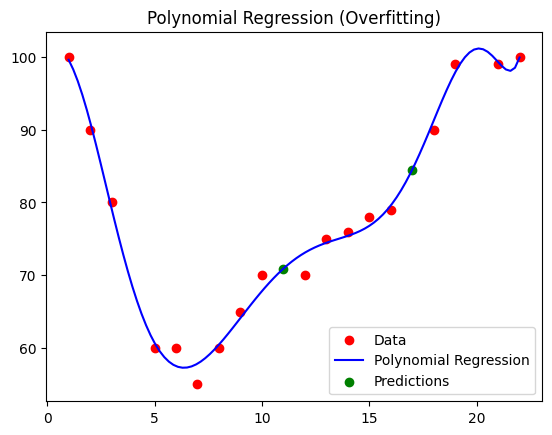

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.07142e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.537e+02, tolerance: 3.954e-01
  model = cd_fast.enet_coordinate_descent(


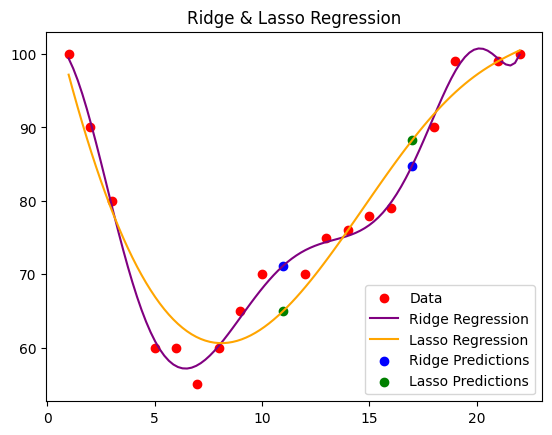

Polynomial Regression Predictions for x=[11,17]: [70.90820784 84.49850019]
Ridge Regression Predictions for x=[11,17]: [71.18775228 84.81454213]
Lasso Regression Predictions for x=[11,17]: [65.02845089 88.26555869]


In [19]:
# POLYNOMIAL RIDGE LASSO
# ACTIVITY 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import make_pipeline

# Given data
x = np.array([1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]).reshape(-1, 1)
y = np.array([100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100])

# Degree of polynomial (high degree for overfitting)
degree = 10

# Polynomial Regression Model
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(x, y)

# Predictions
x_pred = np.array([11, 17]).reshape(-1, 1)
y_pred_poly = poly_model.predict(x_pred)

# Plotting Polynomial Regression
plt.scatter(x, y, color='red', label='Data')
x_range = np.linspace(min(x), max(x), 100).reshape(-1, 1)
plt.plot(x_range, poly_model.predict(x_range), label='Polynomial Regression', color='blue')
plt.scatter(x_pred, y_pred_poly, color='green', label='Predictions')
plt.legend()
plt.title('Polynomial Regression (Overfitting)')
plt.show()

# Ridge and Lasso Regression
ridge_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))
lasso_model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1))

ridge_model.fit(x, y)
lasso_model.fit(x, y)

# Predictions using Ridge and Lasso
y_pred_ridge = ridge_model.predict(x_pred)
y_pred_lasso = lasso_model.predict(x_pred)

# Plotting Ridge and Lasso Regression
plt.scatter(x, y, color='red', label='Data')
plt.plot(x_range, ridge_model.predict(x_range), label='Ridge Regression', color='purple')
plt.plot(x_range, lasso_model.predict(x_range), label='Lasso Regression', color='orange')
plt.scatter(x_pred, y_pred_ridge, color='blue', label='Ridge Predictions')
plt.scatter(x_pred, y_pred_lasso, color='green', label='Lasso Predictions')
plt.legend()
plt.title('Ridge & Lasso Regression')
plt.show()

# Print predictions
print(f'Polynomial Regression Predictions for x=[11,17]: {y_pred_poly}')
print(f'Ridge Regression Predictions for x=[11,17]: {y_pred_ridge}')
print(f'Lasso Regression Predictions for x=[11,17]: {y_pred_lasso}')

